In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import cv2
import dlib
import os
import keras
from keras.preprocessing import image
from keras import utils, layers, models, optimizers
import sklearn
import tensorflow as tf
from os import listdir
from os.path import isfile, join

In [13]:
TEMPLATE = np.float32([
    (0.0792396913815, 0.339223741112), (0.0829219487236, 0.456955367943),
    (0.0967927109165, 0.575648016728), (0.122141515615, 0.691921601066),
    (0.168687863544, 0.800341263616), (0.239789390707, 0.895732504778),
    (0.325662452515, 0.977068762493), (0.422318282013, 1.04329000149),
    (0.531777802068, 1.06080371126), (0.641296298053, 1.03981924107),
    (0.738105872266, 0.972268833998), (0.824444363295, 0.889624082279),
    (0.894792677532, 0.792494155836), (0.939395486253, 0.681546643421),
    (0.96111933829, 0.562238253072), (0.970579841181, 0.441758925744),
    (0.971193274221, 0.322118743967), (0.163846223133, 0.249151738053),
    (0.21780354657, 0.204255863861), (0.291299351124, 0.192367318323),
    (0.367460241458, 0.203582210627), (0.4392945113, 0.233135599851),
    (0.586445962425, 0.228141644834), (0.660152671635, 0.195923841854),
    (0.737466449096, 0.182360984545), (0.813236546239, 0.192828009114),
    (0.8707571886, 0.235293377042), (0.51534533827, 0.31863546193),
    (0.516221448289, 0.396200446263), (0.517118861835, 0.473797687758),
    (0.51816430343, 0.553157797772), (0.433701156035, 0.604054457668),
    (0.475501237769, 0.62076344024), (0.520712933176, 0.634268222208),
    (0.565874114041, 0.618796581487), (0.607054002672, 0.60157671656),
    (0.252418718401, 0.331052263829), (0.298663015648, 0.302646354002),
    (0.355749724218, 0.303020650651), (0.403718978315, 0.33867711083),
    (0.352507175597, 0.349987615384), (0.296791759886, 0.350478978225),
    (0.631326076346, 0.334136672344), (0.679073381078, 0.29645404267),
    (0.73597236153, 0.294721285802), (0.782865376271, 0.321305281656),
    (0.740312274764, 0.341849376713), (0.68499850091, 0.343734332172),
    (0.353167761422, 0.746189164237), (0.414587777921, 0.719053835073),
    (0.477677654595, 0.706835892494), (0.522732900812, 0.717092275768),
    (0.569832064287, 0.705414478982), (0.635195811927, 0.71565572516),
    (0.69951672331, 0.739419187253), (0.639447159575, 0.805236879972),
    (0.576410514055, 0.835436670169), (0.525398405766, 0.841706377792),
    (0.47641545769, 0.837505914975), (0.41379548902, 0.810045601727),
    (0.380084785646, 0.749979603086), (0.477955996282, 0.74513234612),
    (0.523389793327, 0.748924302636), (0.571057789237, 0.74332894691),
    (0.672409137852, 0.744177032192), (0.572539621444, 0.776609286626),
    (0.5240106503, 0.783370783245), (0.477561227414, 0.778476346951)])

TPL_MIN, TPL_MAX = np.min(TEMPLATE, axis=0), np.max(TEMPLATE, axis=0)
MINMAX_TEMPLATE = (TEMPLATE - TPL_MIN) / (TPL_MAX - TPL_MIN)

INNER_EYES_AND_BOTTOM_LIP = np.array([39, 42, 57])
OUTER_EYES_AND_NOSE = np.array([36, 45, 33])

In [14]:
def align_faces(images, landmarks, idx=INNER_EYES_AND_BOTTOM_LIP):
    faces = []
    for (img, marks) in zip(images, landmarks):
        imgDim = img.shape[0]
        coords = shape_to_coords(marks)
        H = cv2.getAffineTransform(coords[idx], imgDim * MINMAX_TEMPLATE[idx])
        warped = cv2.warpAffine(img, H, (imgDim, imgDim))
        faces.append(warped)
    return faces

In [15]:
pose68 = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
pose05 = dlib.shape_predictor('models/shape_predictor_5_face_landmarks.dat')

def face_landmarks(face, model="large"):
    
    if model == "large":
        predictor = pose68
    elif model == "small":
        predictor = pose05
    
    if not isinstance(face, list):
        rect = dlib.rectangle(0,0,face.shape[1],face.shape[0])
        return predictor(face, rect)
    else:
        rect = dlib.rectangle(0,0,face[0].shape[1],face[0].shape[0])
        return [predictor(f,rect) for f in face]

In [44]:
pathFile = "./faces"
files = listdir(pathFile)

imagePaths = []

output = np.transpose([files])
i = 0
for fi in files :
    for fo in [f for f in listdir(pathFile+"/"+fi) if isfile(join(pathFile+"/"+fi, f))] : 
        imagePaths.append([[fi],[i],[fo]])
    i=i+1

    

print(imagePaths[0])

[['Abel_DIDOU'], [0], ['20221117_12512412.jpg']]


In [18]:
def shape_to_coords(shape):
    return np.float32([[p.x, p.y] for p in shape.parts()])

In [16]:
pathFile = "./faces"
files = listdir(pathFile)

for fi in files :
    for fo in [f for f in listdir(pathFile+"/"+fi) if isfile(join(pathFile+"/"+fi, f))] :
        im = cv2.imread(pathFile+"/"+fi+"/"+fo,cv2.IMREAD_UNCHANGED)
        imdest = np.array([])
        imdest = cv2.resize(im, (128,128))
        cv2.imwrite(pathFile+"1281/"+fi+"/"+fo,imdest)
        


In [19]:
pathFile = "./faces2/"
pathFile2 = "./faces1282/"
files = listdir(pathFile)
faces = []
for fi in files :
    faces = []
    for fo in [f for f in listdir(pathFile+"/"+fi) if isfile(join(pathFile+"/"+fi, f))] :
        image = cv2.imread(pathFile+"/"+fi+"/"+fo)
        faces.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    landmarks = face_landmarks(faces)
    aligned = align_faces(faces, landmarks)
    for i in range(0,len(aligned)):
        print(pathFile2+fi+"/"+str(i)+".jpg")
        cv2.imwrite(pathFile2+fi+"/"+str(i)+".jpg",cv2.cvtColor(aligned[i], cv2.COLOR_BGR2RGB))

./faces1282/Abel_DIDOU/0.jpg
./faces1282/Abel_DIDOU/1.jpg
./faces1282/Abel_DIDOU/2.jpg
./faces1282/Adrien_HOUEE/0.jpg
./faces1282/Adrien_HOUEE/1.jpg
./faces1282/Adrien_HOUEE/2.jpg
./faces1282/Adrien_HOUEE/3.jpg
./faces1282/Adrien_HOUEE/4.jpg
./faces1282/Adrien_HOUEE/5.jpg
./faces1282/Adrien_HOUEE/6.jpg
./faces1282/Adrien_HOUEE/7.jpg
./faces1282/Adrien_HOUEE/8.jpg
./faces1282/Adrien_HOUEE/9.jpg
./faces1282/Adrien_HOUEE/10.jpg
./faces1282/Adrien_HOUEE/11.jpg
./faces1282/Adrien_HOUEE/12.jpg
./faces1282/Adrien_HOUEE/13.jpg
./faces1282/Adrien_HOUEE/14.jpg
./faces1282/Adrien_HOUEE/15.jpg
./faces1282/Adrien_HOUEE/16.jpg
./faces1282/Adrien_HOUEE/17.jpg
./faces1282/Adrien_HOUEE/18.jpg
./faces1282/Adrien_HOUEE/19.jpg
./faces1282/Adrien_HOUEE/20.jpg
./faces1282/Adrien_HOUEE/21.jpg
./faces1282/Adrien_HOUEE/22.jpg
./faces1282/Adrien_HOUEE/23.jpg
./faces1282/Adrien_HOUEE/24.jpg
./faces1282/Adrien_HOUEE/25.jpg
./faces1282/Adrien_HOUEE/26.jpg
./faces1282/Adrien_HOUEE/27.jpg
./faces1282/Adrien_HOUEE/28

In [21]:
def show_grid(faces, figsize=(12,3)):

    n = len(faces)
    cols = 7
    rows = int(np.ceil(n/cols))
    
    fig, ax = plt.subplots(rows,cols, figsize=figsize)

    for r in range(rows):
        for c in range(cols):
            i = r*cols + c
            if i == n:
                 break
            ax[r,c].imshow(faces[i])
            ax[r,c].axis('off')
            #ax[r,c].set_title('size: ' + str(faces[i].shape[:2]))

In [229]:
landmarks = face_landmarks(faces)
aligned = align_faces(faces, landmarks)

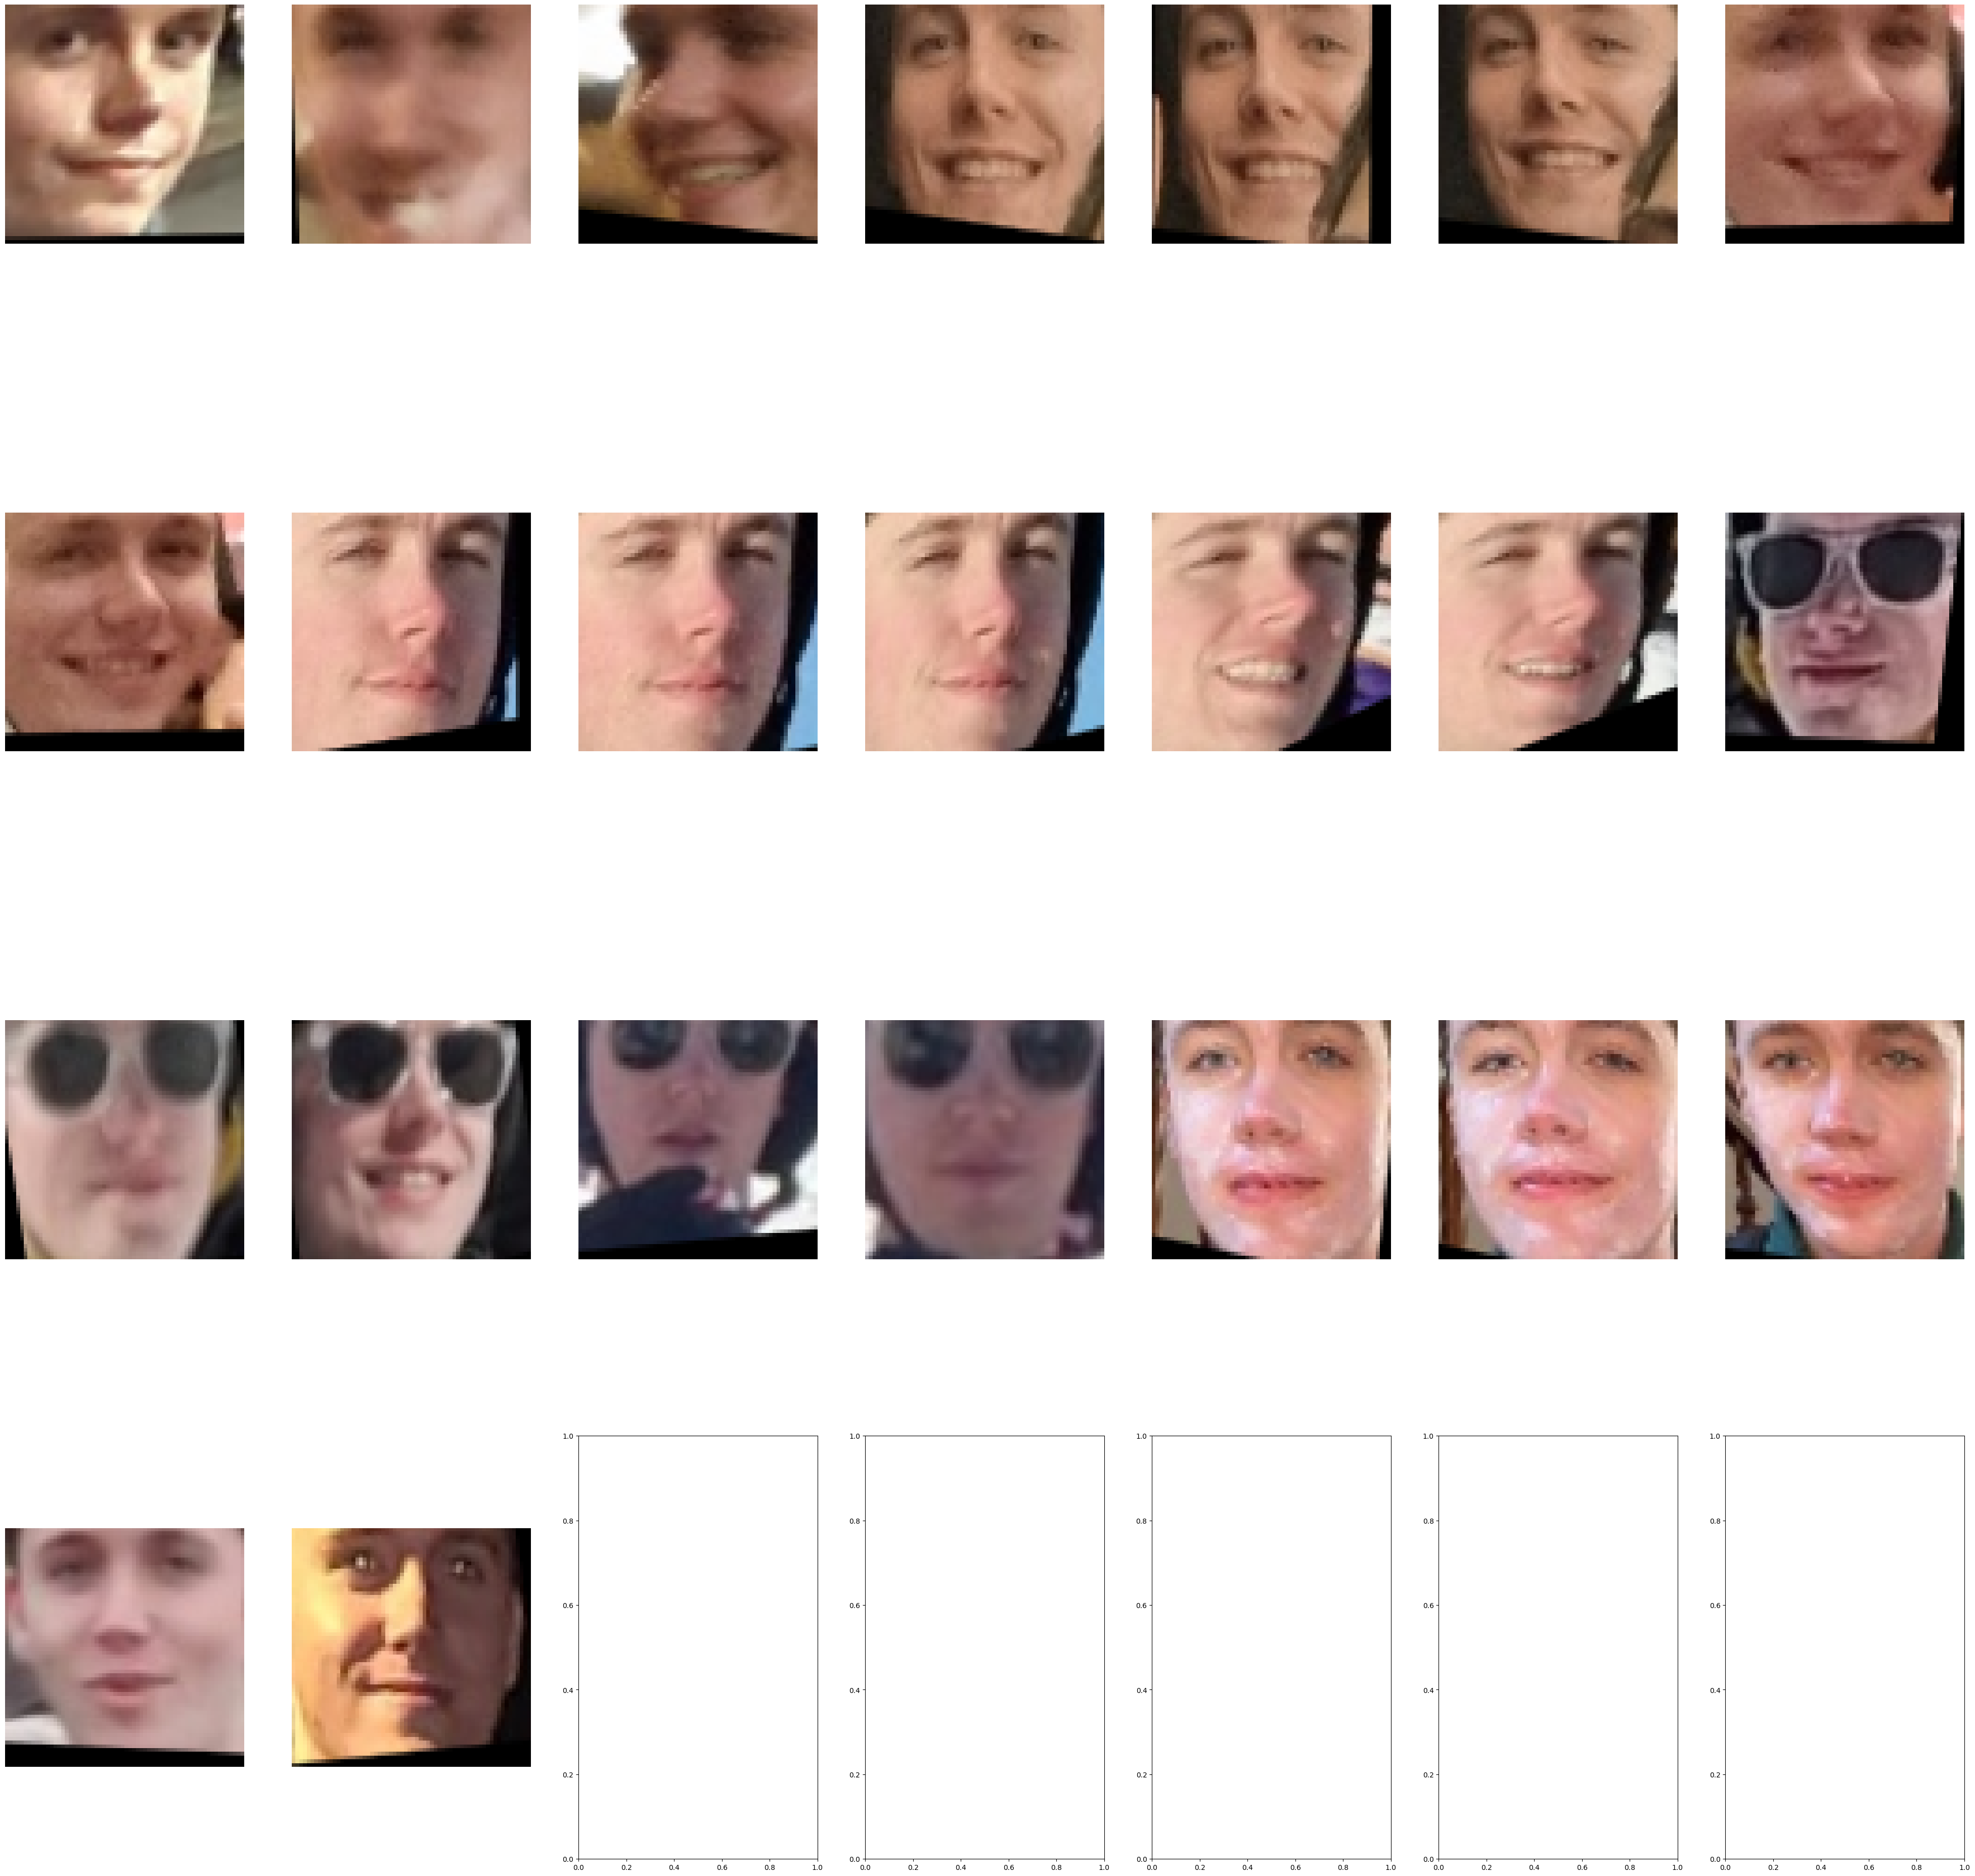

In [23]:
show_grid(aligned, figsize=(50,50))

In [40]:
n_pix = 64

datagen = image.ImageDataGenerator(rescale=1, validation_split=0.3)
# train set
train_generator = datagen.flow_from_directory("./faces3/", subset='training', target_size=(n_pix,n_pix), batch_size=32)

# validation set
valid_generator = datagen.flow_from_directory("./faces3/", subset='validation', target_size=(n_pix,n_pix), batch_size=32)

Found 182 images belonging to 9 classes.
Found 73 images belonging to 9 classes.


data batch shape: (32, 64, 64, 3)
data label shape: (32, 9)
data label shape: [0. 0. 0. 0. 0. 1. 0. 0. 0.]
(64, 64, 3)


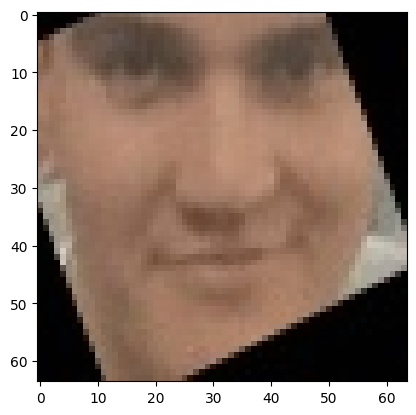

In [52]:

for data_batch, labels_batch in train_generator:
    
    print('data batch shape:', data_batch.shape)
    print('data label shape:', labels_batch.shape)
    print('data label shape:', labels_batch[0])
    print(data_batch[0].shape)
    plt.imshow(((255-data_batch[0]) * 255).astype(np.uint8))
    plt.show()
    
    break

In [94]:
# Define the network. Hint: use the functional API

# Define the input layer
X_input = layers.Input((64,64,3))

# Stack the shared layers
X = layers.Conv2D(64, (3,3), activation='relu')(X_input)
#0.1644
X = layers.Conv2D(32, (3,3), activation='relu')(X)
#0.3425
X = layers.Conv2D(32, (3,3), activation='relu')(X)
X = layers.Dropout(.1)(X) #0.5068
X = layers.MaxPooling2D((2,2))(X)

#X = layers.Dropout(.1)(X)
#0.5479
X = layers.Flatten()(X)

X = layers.Dense(16)(X)
#X = layers.Dropout(.1)(X)#0.5890 
X = layers.Dense(16)(X)

X = layers.Dense(9, activation='softmax', name="bg")(X) # output 2

#0.4795
# Create the multi-output model
model = models.Model(inputs = X_input, outputs = X)

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-5), metrics=['acc'])
#model.summary()
# Train the network. Hint: use .fit_generator(...)
history = model.fit(
      train_generator,
      steps_per_epoch=6,
      epochs=45,
      validation_data=valid_generator,
      validation_steps=3) # ADD CODE HERE

Epoch 1/45
6/6 [==============================] - 2s 243ms/step - loss: 16.6255 - acc: 0.1758 - val_loss: 12.6344 - val_acc: 0.4247
Epoch 2/45
6/6 [==============================] - 1s 230ms/step - loss: 12.1165 - acc: 0.3187 - val_loss: 9.6019 - val_acc: 0.3699
Epoch 3/45
6/6 [==============================] - 1s 220ms/step - loss: 9.8401 - acc: 0.1978 - val_loss: 8.0367 - val_acc: 0.1918
Epoch 4/45
6/6 [==============================] - 1s 218ms/step - loss: 8.5301 - acc: 0.2473 - val_loss: 7.4460 - val_acc: 0.3699
Epoch 5/45
6/6 [==============================] - 1s 222ms/step - loss: 7.5356 - acc: 0.2967 - val_loss: 7.6917 - val_acc: 0.3151
Epoch 6/45
6/6 [==============================] - 1s 219ms/step - loss: 6.3967 - acc: 0.2637 - val_loss: 6.5471 - val_acc: 0.3014
Epoch 7/45
6/6 [==============================] - 1s 217ms/step - loss: 6.2394 - acc: 0.3022 - val_loss: 6.1354 - val_acc: 0.3699
Epoch 8/45
6/6 [==============================] - 1s 218ms/step - loss: 5.8203 - acc: 0

Found 4 images belonging to 1 classes.
['images']
1/1 [==============================] - 0s 63ms/step


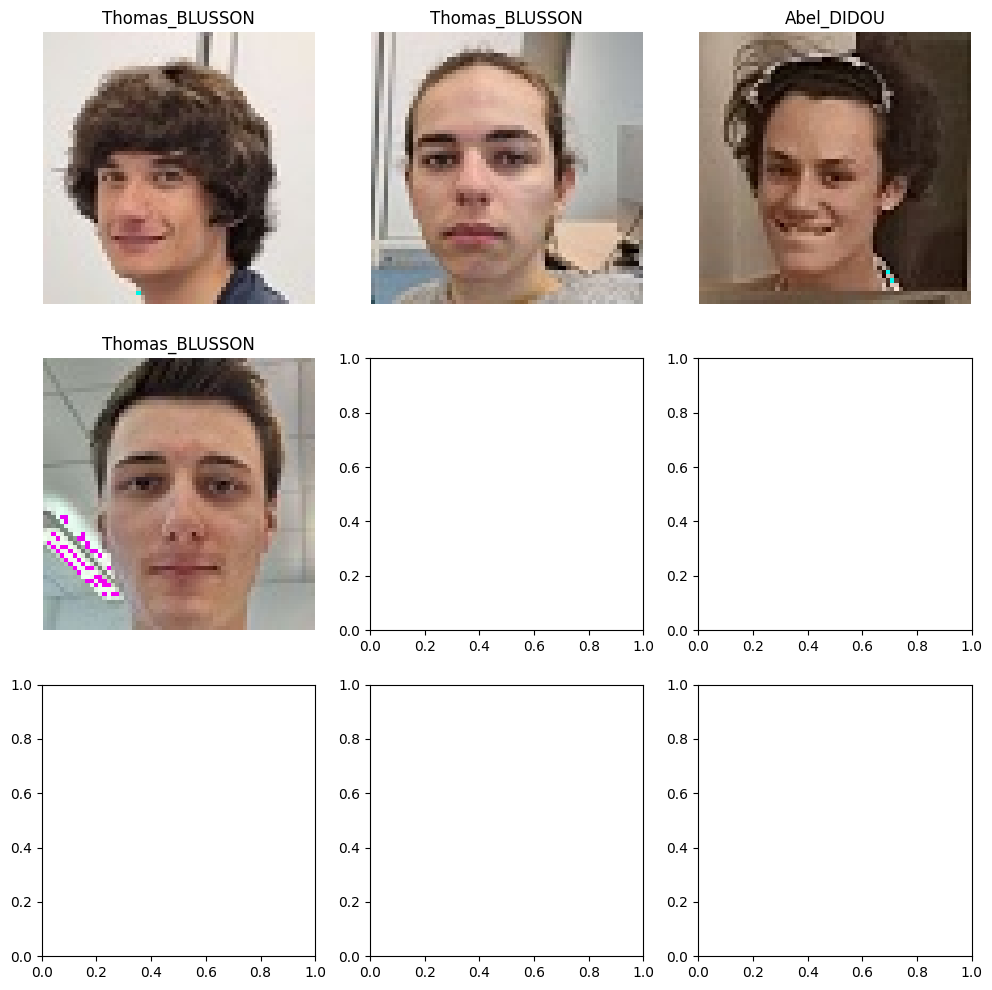

In [92]:
classes = list(train_generator.class_indices.keys())
# Read the test images

test_generator = datagen.flow_from_directory("./exemples/", class_mode=None, target_size=(64,64), batch_size=9)
print(listdir("./exemples/"))

test_images = next(test_generator)

# Test the network. Hint: use .predict() and .argmax()
preds  = model.predict(test_images) # ADD CODE HERE
labels = preds.argmax(axis=1) # ADD CODE HERE

# Visualize the predictions
f, ax = plt.subplots(3, 3, figsize=(12,12))
for i, img in enumerate(test_images):
    ax.flat[i].imshow(((255-img) * 255).astype(np.uint8))
    ax.flat[i].axis("off")
    ax.flat[i].set_title(classes[labels[i]])
plt.show()